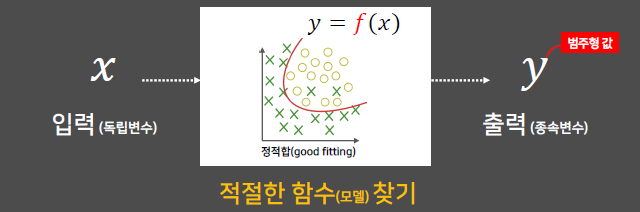

In [1]:
'''
# 패키지가 설치되지 않았을 경우: "!pip install [패키지명]" 실행
!pip install matplotlib
!pip install scikit-learn
'''

# 필요한 패키지 불러오기
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
# random seed 고정
random.seed(42)
np.random.seed(42)

In [3]:
# 데이터 입력
dt = pd.read_csv('./manufacturing_defect_dataset.csv')
dt.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [4]:
# 데이터 타입 확인
# Y: DefectsStatus (0 또는 1의 binary class)
# Binary class의 경우, int 타입을 변경하지 않아도 학습 가능 (변경 시, df['column'].astype(bool))
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

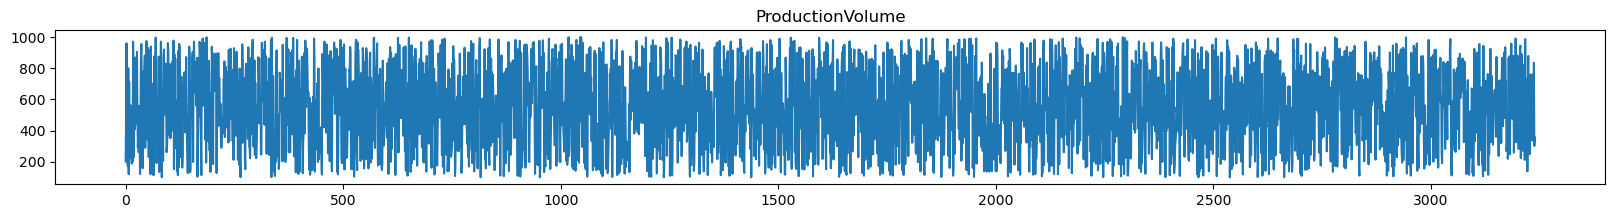

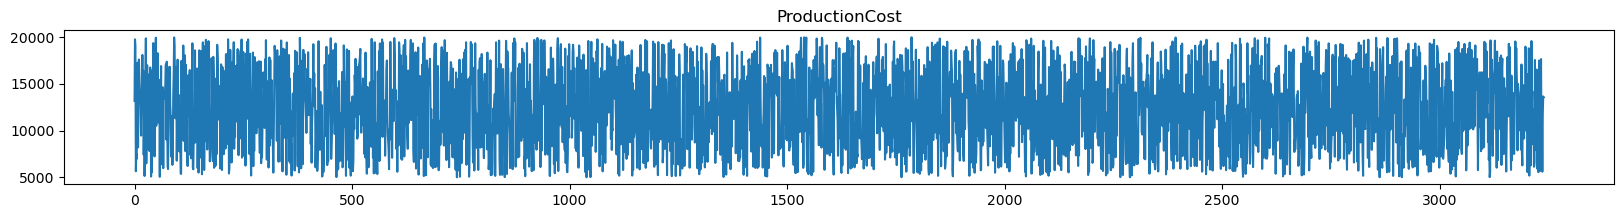

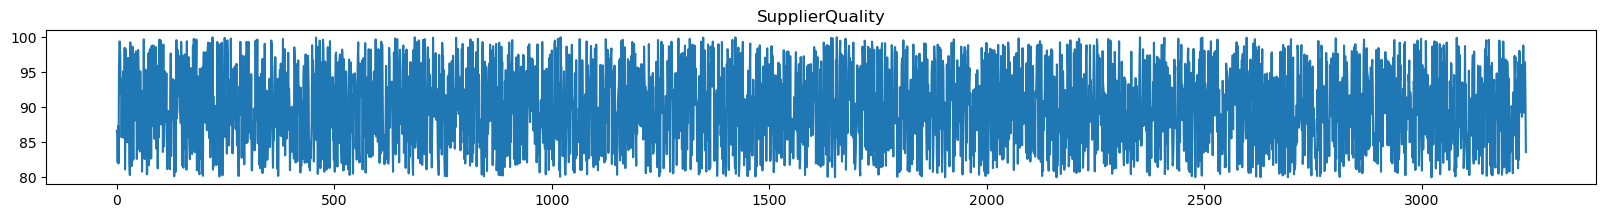

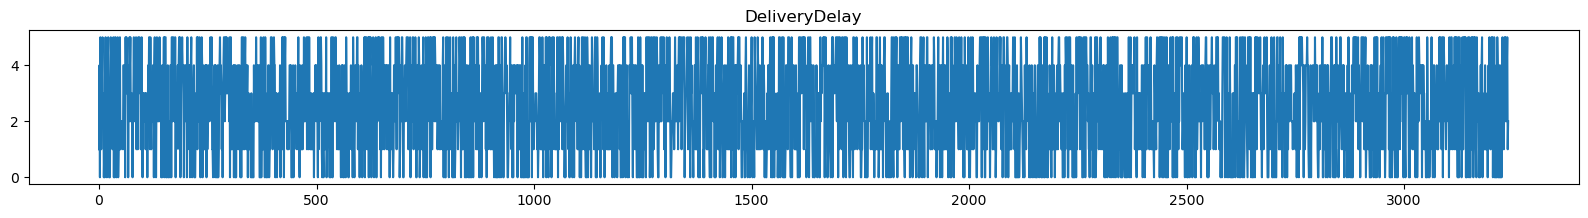

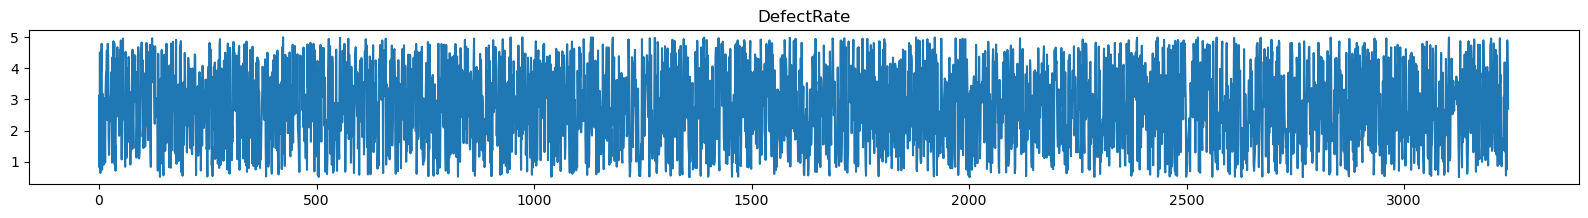

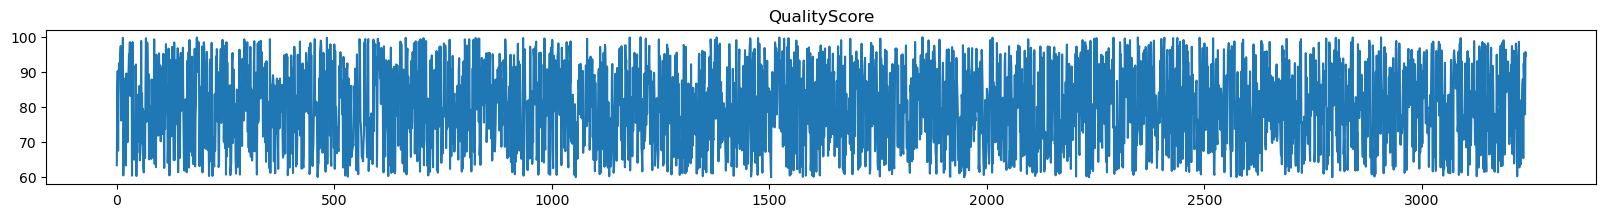

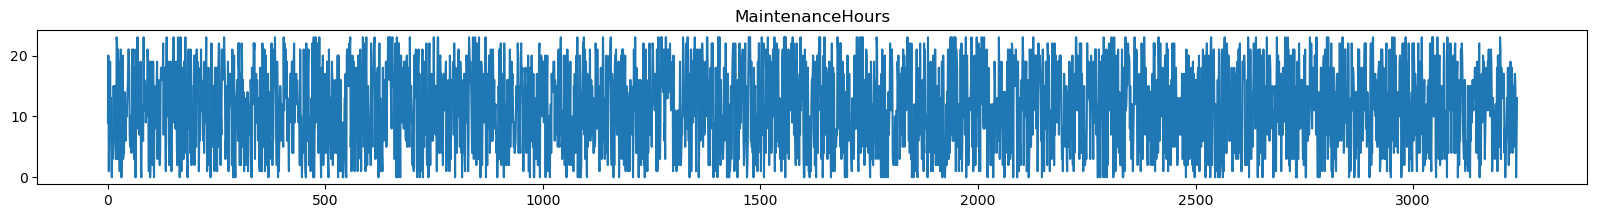

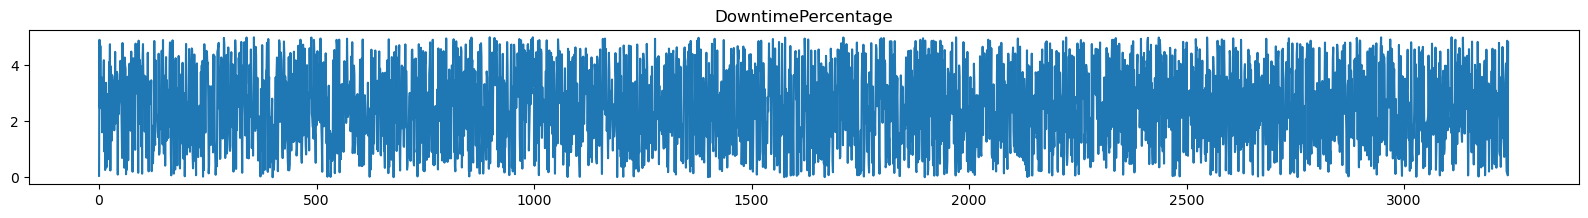

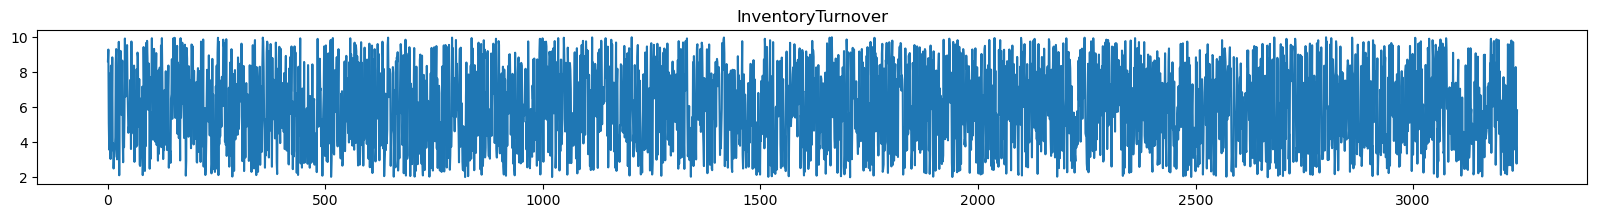

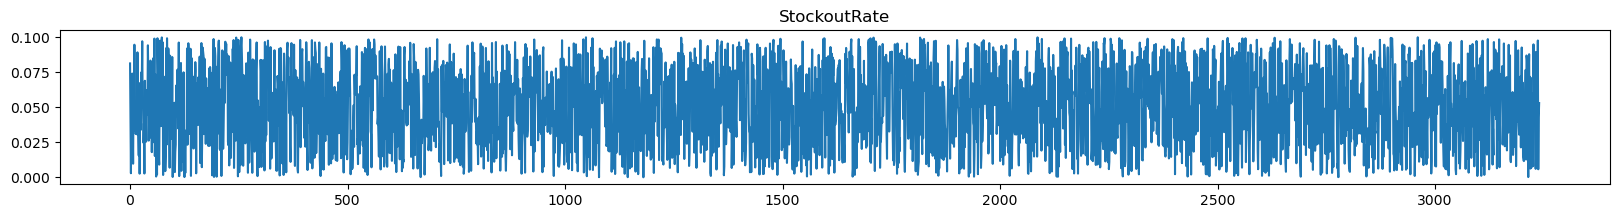

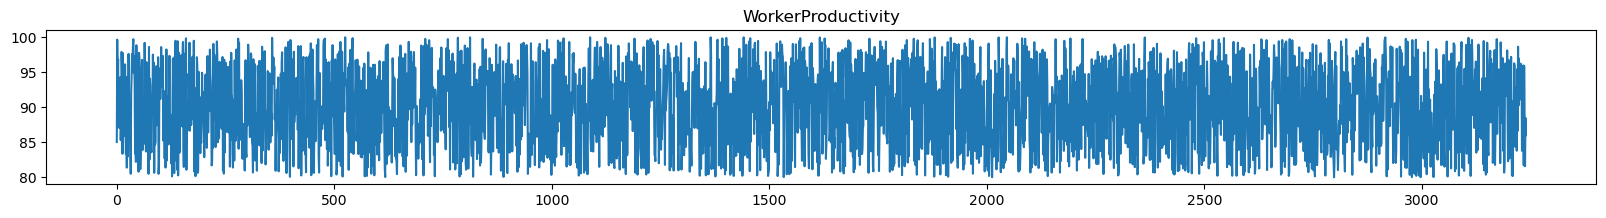

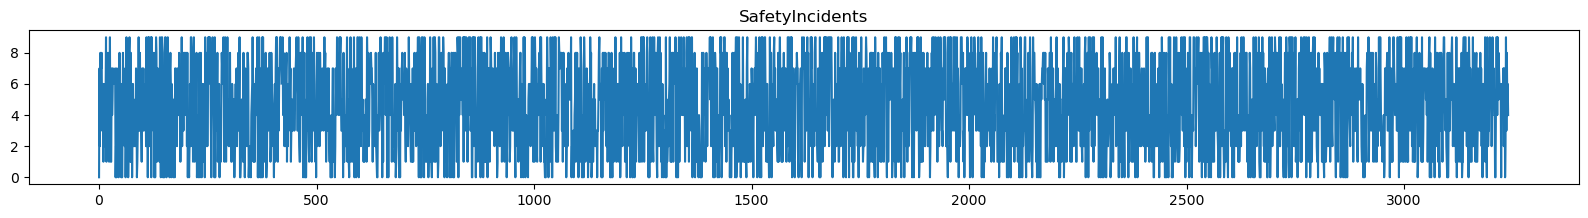

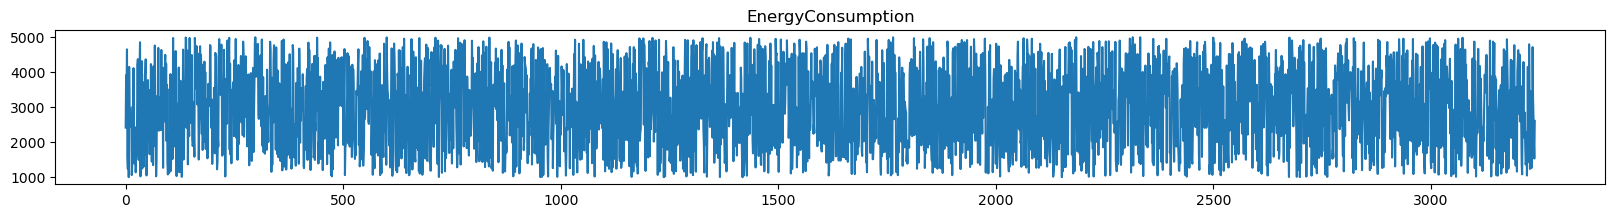

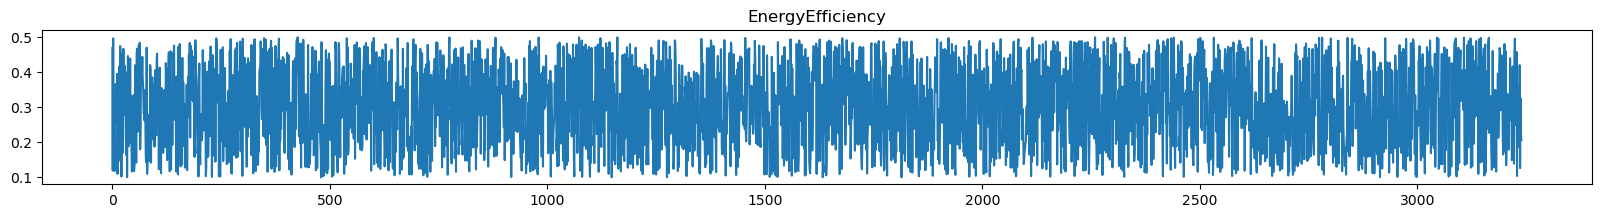

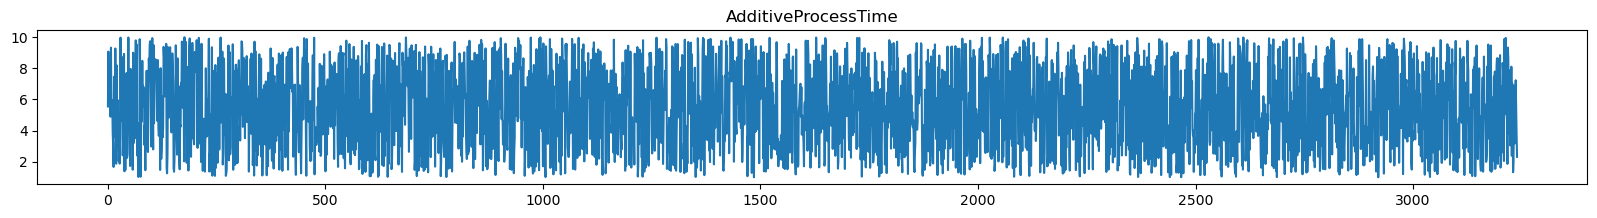

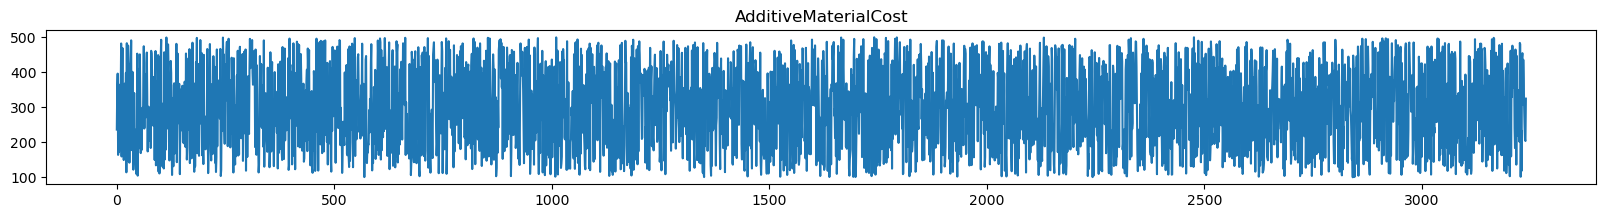

In [5]:
# 데이터 패턴 확인 (수집된 시간 흐름에 따른 단순 plotting)
for c in dt.columns[:-1]:
    plt.figure(figsize = (20, 2))
    plt.plot(dt[c])
    plt.title(c)
    plt.show()

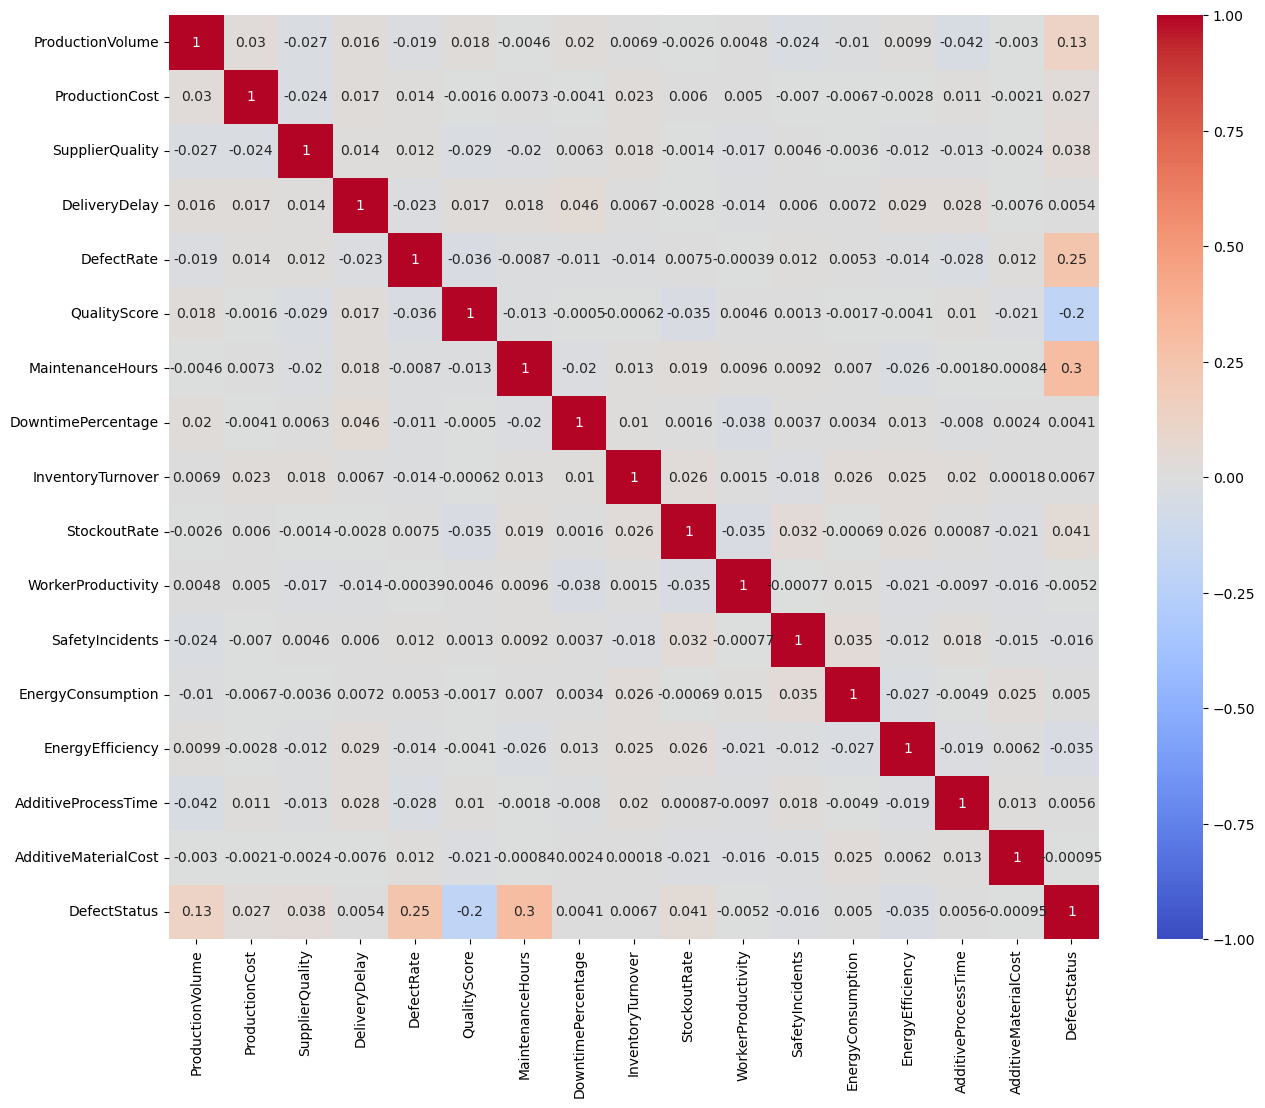

In [6]:
# 상관성 분석
plt.figure(figsize=(15,12))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [7]:
# 데이터 분할(X/Y, Train/Test)
X = dt.iloc[:, :-1];   y = dt.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

print("Data shape:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Data shape:
(2592, 16) (648, 16) (2592,) (648,)


In [8]:
print("Class ratio for train data:")
print(y_train.value_counts())
print()
print("Class ratio for test data:")
print(y_test.value_counts())

Class ratio for train data:
1    2178
0     414
Name: DefectStatus, dtype: int64

Class ratio for test data:
1    545
0    103
Name: DefectStatus, dtype: int64


In [9]:
# 데이터 요약 통계량
X_train.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost
count,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000
mean,548.228009,12393.743710,89.780674,2.552083,2.762595,80.024427,11.420525,2.518679,6.012994,0.050711,90.063998,4.590664,2981.924618,0.298714,5.478153,298.574612
std,261.649106,4295.235633,5.764935,1.715929,1.320617,11.546872,6.921337,1.444090,2.355856,0.028953,5.728025,2.888691,1160.188627,0.116487,2.576976,117.249615
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.020322,0.000000,1000.720156,0.100238,1.000151,100.211137
25%,322.000000,8722.582068,84.841046,1.000000,1.589934,70.044159,5.000000,1.284417,3.902378,0.025629,85.159874,2.000000,1955.713805,0.197896,3.301160,191.859275
50%,549.000000,12316.260404,89.683976,3.000000,2.774975,80.162259,12.000000,2.495127,6.026835,0.051301,90.162467,5.000000,3012.565465,0.295897,5.456084,298.572137
75%,775.000000,16082.136605,94.656200,4.000000,3.927684,90.265873,17.000000,3.798183,8.064321,0.075797,95.064646,7.000000,3980.376461,0.403188,7.669735,403.843546
max,999.000000,19993.365549,99.989214,5.000000,4.997008,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782


In [10]:
# 데이터 표준화: Min-max scaler (0-1 사이 변환), Standard scaler (표준정규화)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = dt.columns[:-1])

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = dt.columns[:-1])

X_train.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost
count,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03
mean,9.046262e-17,-3.070246e-16,-1.727014e-16,-5.688180e-17,3.262137e-16,4.773274e-16,-1.041691e-16,2.576814e-16,-6.133640e-17,-5.345518e-17,2.165620e-16,-9.046262e-17,3.207311e-16,-8.086810e-17,1.727014e-16,7.949745e-17
std,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00
min,-1.713419e+00,-1.721674e+00,-1.696071e+00,-1.487577e+00,-1.713079e+00,-1.733646e+00,-1.650364e+00,-1.743312e+00,-1.703057e+00,-1.751745e+00,-1.753766e+00,-1.589491e+00,-1.707987e+00,-1.704174e+00,-1.738032e+00,-1.692131e+00
25%,-8.647905e-01,-8.548705e-01,-8.570055e-01,-9.046896e-01,-8.881359e-01,-8.644933e-01,-9.278212e-01,-8.548637e-01,-8.960747e-01,-8.664610e-01,-8.563284e-01,-8.970026e-01,-8.846913e-01,-8.656509e-01,-8.449487e-01,-9.103307e-01
50%,2.951050e-03,-1.804284e-02,-1.677662e-02,2.610849e-01,9.376334e-03,1.193907e-02,8.373918e-02,-1.631212e-02,5.876156e-03,2.038004e-02,1.719392e-02,1.417304e-01,2.641532e-02,-2.418463e-02,-8.565327e-03,-2.111229e-05
75%,8.668700e-01,8.588829e-01,8.458841e-01,8.439722e-01,8.824009e-01,8.871167e-01,8.062823e-01,8.861982e-01,8.709031e-01,8.666051e-01,8.731827e-01,8.342191e-01,8.607605e-01,8.970492e-01,8.506113e-01,8.979923e-01
max,1.723144e+00,1.769656e+00,1.771141e+00,1.426859e+00,1.692273e+00,1.730029e+00,1.673334e+00,1.716922e+00,1.692103e+00,1.702597e+00,1.734403e+00,1.526708e+00,1.737251e+00,1.724011e+00,1.754952e+00,1.718104e+00


## Option 1. Scikit-learn package 활용

In [11]:
# 필요한 패키지 불러오기
from sklearn.neural_network import MLPClassifier

In [12]:
# MLP 분류기 정의
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# MLP 모델 학습
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

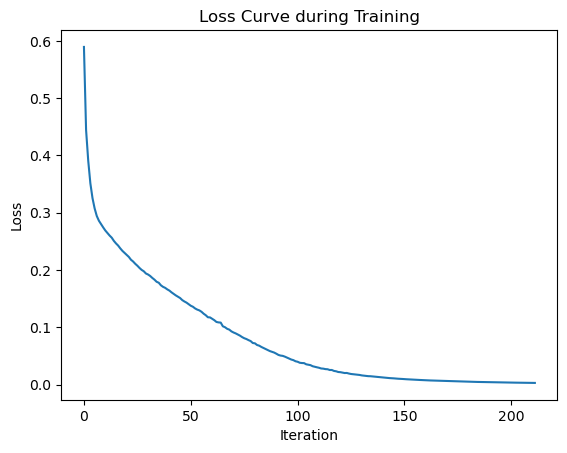

In [13]:
# 손실 값 (훈련 중 loss curve)
# Iteration: 한 번의 배치(batch)에 대해 모델이 업데이트될 때마다 한 iteration 발생
# Epoch: 전체 훈련 데이터셋을 한 번 전체 학습하는 것이 1 epoch
plt.plot(clf.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve during Training')
plt.show()

In [14]:
# Class 예측
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [15]:
# 각 Class에 할당될 확률 예측
y_prob = clf.predict_proba(X_test)
y_prob

array([[2.07048505e-04, 9.99792951e-01],
       [8.97691243e-01, 1.02308757e-01],
       [3.24721481e-01, 6.75278519e-01],
       ...,
       [6.58330571e-02, 9.34166943e-01],
       [1.36950458e-02, 9.86304954e-01],
       [9.61820499e-01, 3.81795007e-02]])

> ### Confusion Matrix
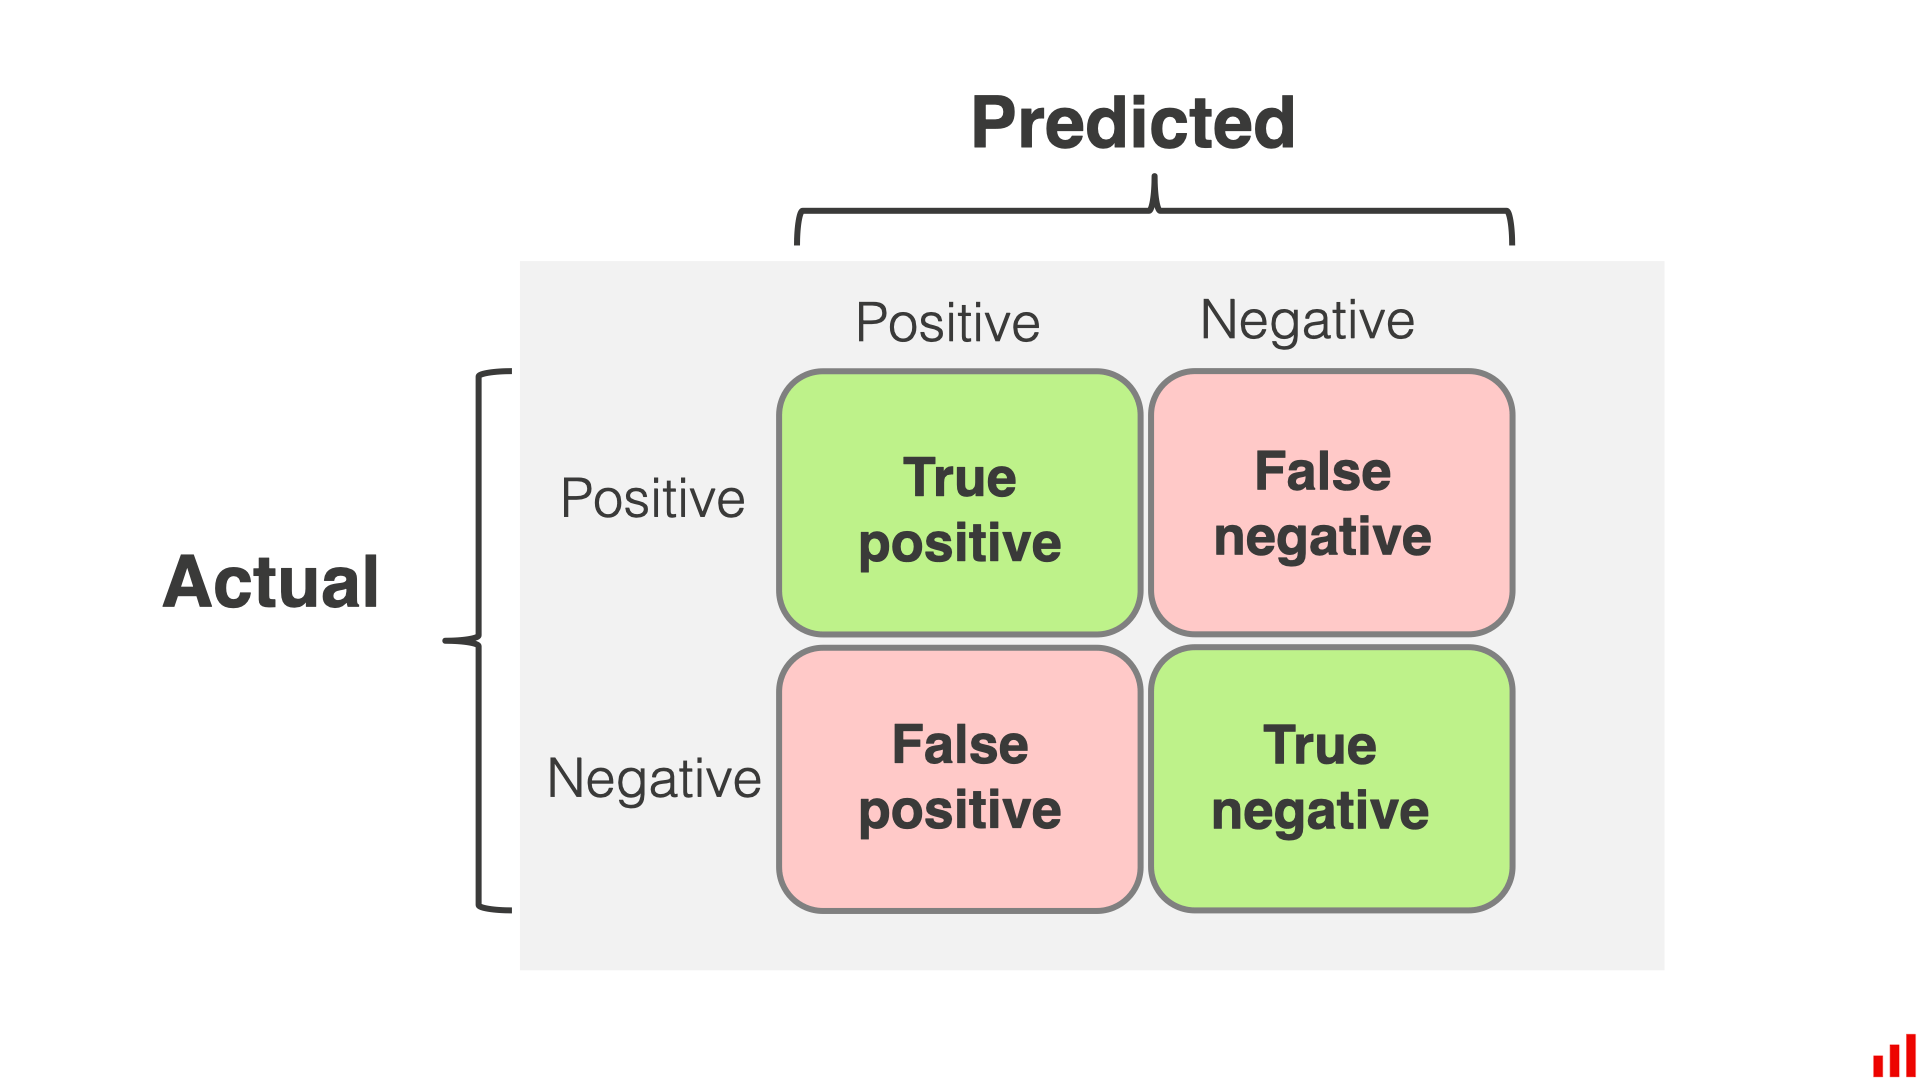

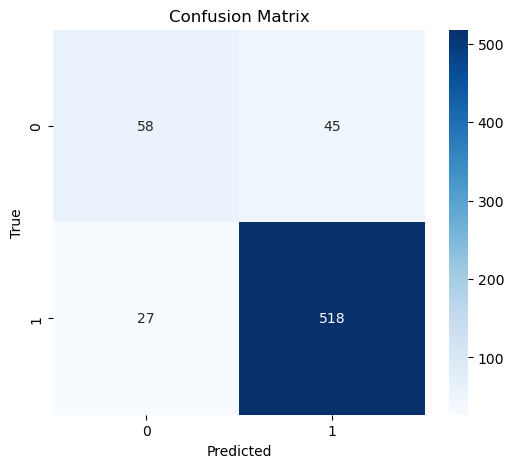

In [16]:
# 분류 평가 지표: Confusion Matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

> ### Performance measures
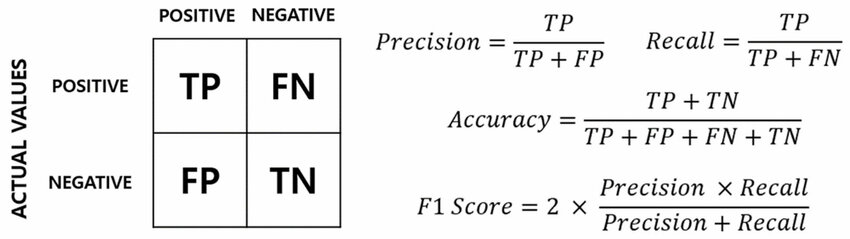

In [17]:
# 분류 평가 지표: Precision, Recall, F1-score
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.56      0.62       103
           1       0.92      0.95      0.94       545

    accuracy                           0.89       648
   macro avg       0.80      0.76      0.78       648
weighted avg       0.88      0.89      0.88       648



## Option 2. PyTorch framework 활용

In [18]:
# 필요한 패키지 불러오기
# torch가 없을 경우, !pip install torch (GPU 사용을 위해서는 CUDA, Cudnn 설정 필요)
import torch
import torch.nn as nn
import torch.optim as optim

# random seed 고정
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)  # multi-GPU 사용 시
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [19]:
# 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [20]:
# 데이터프레임을 행렬(array) 형태로 변환 => 텐서 변환을 위한 작업
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

# 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

print(X_train_tensor.shape, y_train_tensor.shape, X_test_tensor.shape, y_test_tensor.shape)

torch.Size([2592, 16]) torch.Size([2592]) torch.Size([648, 16]) torch.Size([648])


In [21]:
# 텐서 shape 변환: [N, 1]
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device).view(-1, 1)

print(X_train_tensor.shape, y_train_tensor.shape, X_test_tensor.shape, y_test_tensor.shape)

torch.Size([2592, 16]) torch.Size([2592, 1]) torch.Size([648, 16]) torch.Size([648, 1])


In [22]:
# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(16, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 1),  # 이진 분류는 1개의 출력 뉴런
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = MLP().to(device)

In [23]:
# 손실 함수 및 최적화함수 정의
criterion = nn.BCEWithLogitsLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [24]:
# MLP 모델 학습
epochs = 300
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/300], Loss: 0.4728
Epoch [20/300], Loss: 0.4729
Epoch [30/300], Loss: 0.4726
Epoch [40/300], Loss: 0.4698
Epoch [50/300], Loss: 0.4581
Epoch [60/300], Loss: 0.4474
Epoch [70/300], Loss: 0.4311
Epoch [80/300], Loss: 0.4184
Epoch [90/300], Loss: 0.4128
Epoch [100/300], Loss: 0.4102
Epoch [110/300], Loss: 0.4088
Epoch [120/300], Loss: 0.4080
Epoch [130/300], Loss: 0.4061
Epoch [140/300], Loss: 0.4044
Epoch [150/300], Loss: 0.4034
Epoch [160/300], Loss: 0.4024
Epoch [170/300], Loss: 0.4018
Epoch [180/300], Loss: 0.4015
Epoch [190/300], Loss: 0.4012
Epoch [200/300], Loss: 0.4011
Epoch [210/300], Loss: 0.4008
Epoch [220/300], Loss: 0.4004
Epoch [230/300], Loss: 0.4003
Epoch [240/300], Loss: 0.4003
Epoch [250/300], Loss: 0.4003
Epoch [260/300], Loss: 0.4003
Epoch [270/300], Loss: 0.4003
Epoch [280/300], Loss: 0.4003
Epoch [290/300], Loss: 0.4003
Epoch [300/300], Loss: 0.4003


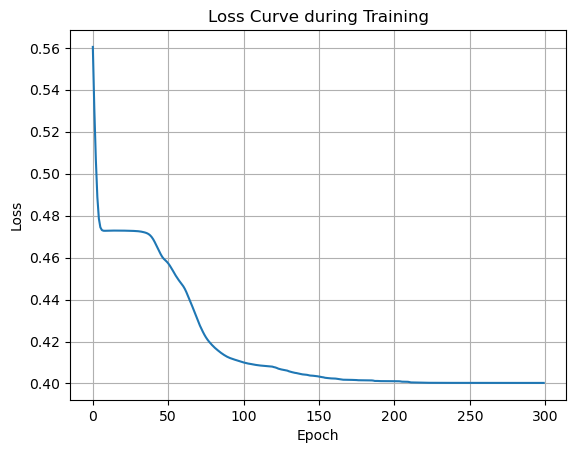

In [25]:
# 손실 값 시각화
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve during Training')
plt.grid(True)
plt.show()

In [26]:
# 모델 평가
model.eval()
with torch.no_grad():
    test_output = model(X_test_tensor).squeeze()
    y_pred_tensor = (test_output > 0.5).long()  # 0.5 기준으로 분류
    
    y_pred = y_pred_tensor.cpu().numpy()
    y_prob = torch.sigmoid(test_output).cpu().numpy()  # 확률값 계산

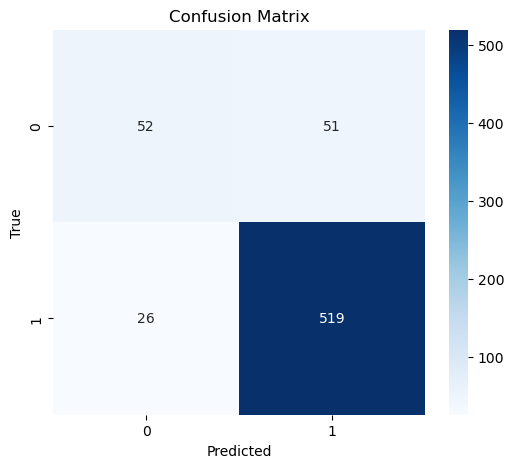

In [27]:
# 분류 평가 지표: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [28]:
# 분류 평가 지표: Precision, Recall, F1-score
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.50      0.57       103
           1       0.91      0.95      0.93       545

    accuracy                           0.88       648
   macro avg       0.79      0.73      0.75       648
weighted avg       0.87      0.88      0.87       648

